# Case Study: How Does a Bike-Share Navigate Speedy Success

## Outlines

### How do annual members and casual riders use Cyclistic bikes differently?


## I- Question

## II- Importing


### Importing libraries


In [2]:
from glob import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns


In [3]:
current_path = os.getcwd()

In [4]:
current_path

'C:\\Users\\Moustafa Abdel-sttar'

In [5]:
files = glob('C:\\Users\\Moustafa Abdel-sttar\\case_study\\*-divvy-tripdata.csv')
#files

In [6]:
def wrangle (filepath):
    df=pd.read_csv(filepath)
    return df

In [7]:
frames=[]
for file in files:
    df=wrangle(file)
    frames.append(df)

In [8]:
df = pd.concat(frames,ignore_index=True)

## III- Data cleaning and processing


In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,954144C2F67B1932,classic_bike,7/5/2022 8:12,7/5/2022 8:24,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,0:12:00,3
1,292E027607D218B6,classic_bike,7/26/2022 12:53,7/26/2022 12:55,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0:02:00,3
2,57765852588AD6E0,classic_bike,7/3/2022 13:58,7/3/2022 14:06,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0:08:00,1
3,B5B6BE44314590E6,classic_bike,7/31/2022 17:44,7/31/2022 18:42,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,0:58:00,1
4,A4C331F2A00E79E0,classic_bike,7/13/2022 19:49,7/13/2022 20:15,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,0:26:00,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779444 entries, 0 to 5779443
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  day_of_week         int64  
dtypes: float64(4), int64(1), object(10)
memory usage: 661.4+ MB


### Handling Nulls

In [11]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    857860
start_station_id      857992
end_station_name      915655
end_station_id        915796
start_lat                  0
start_lng                  0
end_lat                 5795
end_lng                 5795
member_casual              0
ride_length                0
day_of_week                0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
def convert_to_total_minutes(time_str):
    try:
        hours_str, minutes_str, seconds_str = time_str.split(':')
        hours = int(hours_str)
        minutes = int(minutes_str)
        seconds = int(seconds_str)
        total_minutes = (hours * 60) + minutes + (seconds / 60)
        return total_minutes
    except ValueError:
        return None

df['ride_length_minutes'] = df['ride_length'].apply(convert_to_total_minutes)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409089 entries, 0 to 5779439
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ride_id              object 
 1   rideable_type        object 
 2   started_at           object 
 3   ended_at             object 
 4   start_station_name   object 
 5   start_station_id     object 
 6   end_station_name     object 
 7   end_station_id       object 
 8   start_lat            float64
 9   start_lng            float64
 10  end_lat              float64
 11  end_lng              float64
 12  member_casual        object 
 13  ride_length          object 
 14  day_of_week          int64  
 15  ride_length_minutes  float64
dtypes: float64(5), int64(1), object(10)
memory usage: 571.9+ MB


### Membership Type Comparison

In [15]:
data_grouped_c=df['member_casual'].value_counts(normalize=True)

In [16]:
data_grouped_c

member    0.619959
casual    0.380041
Name: member_casual, dtype: float64

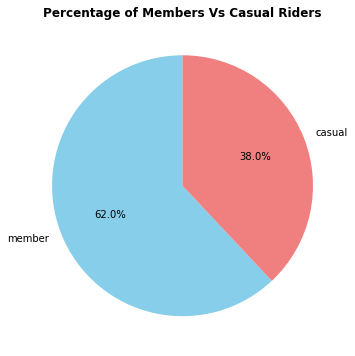

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(data_grouped_c, labels=data_grouped_c.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Members Vs Casual Riders',fontweight='bold')
plt.show()

### Ride Duration Analysis

In [18]:
df['ride_length_minutes'].describe()

count    4.409014e+06
mean     1.605187e+01
std      3.697667e+01
min      0.000000e+00
25%      5.750000e+00
50%      1.000000e+01
75%      1.793333e+01
max      3.203500e+04
Name: ride_length_minutes, dtype: float64

In [19]:
Q1 = df['ride_length_minutes'].quantile(0.25)
Q3 = df['ride_length_minutes'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['ride_length_minutes'] >= Q1 - 1.5 * IQR) & (df['ride_length_minutes'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  

<AxesSubplot:>

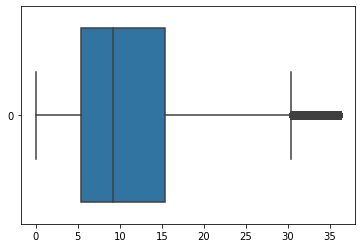

In [20]:
sns.boxplot(data=df['ride_length_minutes'],orient='h')

<AxesSubplot:xlabel='ride_length_minutes', ylabel='member_casual'>

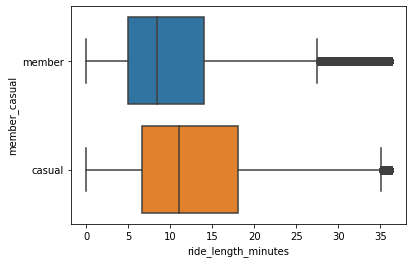

In [21]:
sns.boxplot(x='ride_length_minutes', y='member_casual', data=df, orient='h')


### Usage Patterns

In [22]:
df['rideable_type'].unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [23]:
data_grouped_cb = df.groupby(['rideable_type', 'member_casual']).size().reset_index(name='count')

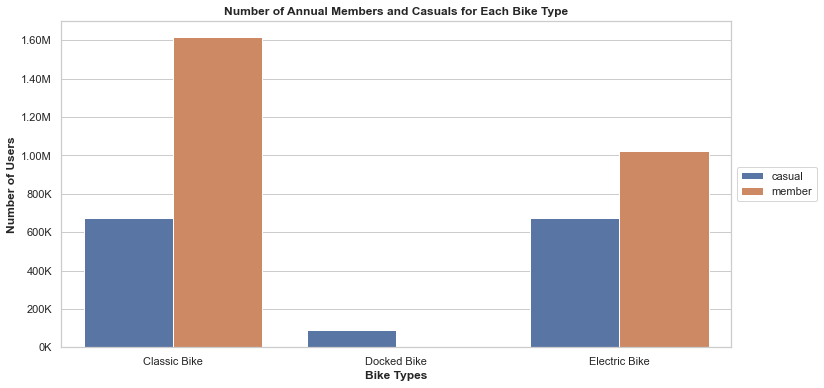

In [24]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=data_grouped_cb, x='rideable_type', y='count', hue='member_casual')
def format_millions(x, pos):
    if x >= 1e6:
        return '{:,.2f}M'.format(x / 1e6)
    else:
        return '{:,.0f}K'.format(x/1e3)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_millions))
plt.xlabel('Bike Types',fontweight='bold')
plt.ylabel('Number of Users',fontweight='bold')
plt.title('Number of Annual Members and Casuals for Each Bike Type',fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
new_labels = ['Classic Bike', 'Docked Bike', 'Electric Bike']
ax.set_xticklabels(new_labels)
plt.show()

### Start and End Stations

In [25]:
len(df['start_station_name'].unique())

1680

In [27]:
start_station_counts = df.groupby(['start_station_name', 'member_casual']).size().reset_index(name='ride_count_start')


In [31]:
end_station_counts = df.groupby(['end_station_name', 'member_casual']).size().reset_index(name='ride_count_end')


In [34]:
top_start_stations = start_station_counts.groupby('start_station_name').sum().nlargest(5, 'ride_count_start').index
top_end_stations = end_station_counts.groupby('end_station_name').sum().nlargest(5, 'ride_count_end').index


In [35]:
start_station_counts = start_station_counts[start_station_counts['start_station_name'].isin(top_start_stations)].sort_values('ride_count_start', ascending=False)
end_station_counts = end_station_counts[end_station_counts['end_station_name'].isin(top_end_stations)].sort_values('ride_count_end', ascending=False)

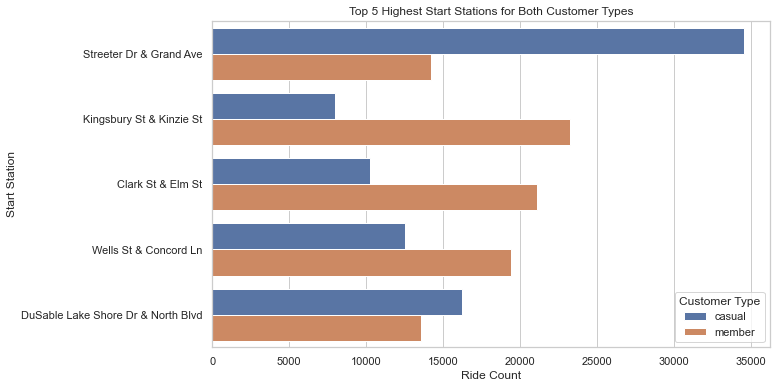

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=start_station_counts, x='ride_count_start', y='start_station_name', hue='member_casual', orient='h')
plt.xlabel('Ride Count')
plt.ylabel('Start Station')
plt.title('Top 5 Highest Start Stations for Both Customer Types')
plt.legend(title='Customer Type')
plt.show()

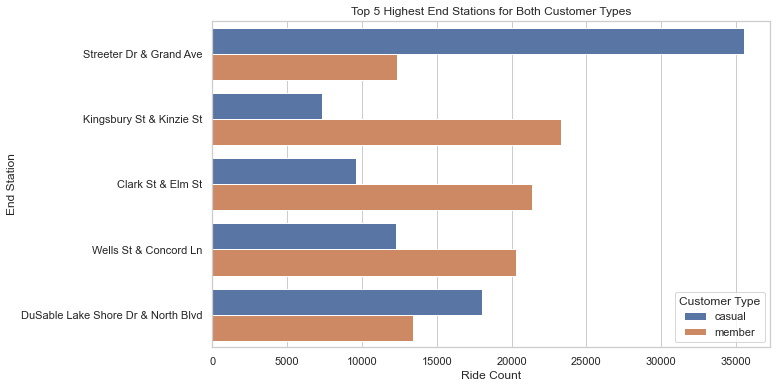

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=end_station_counts, x='ride_count_end', y='end_station_name', hue='member_casual', orient='h')
plt.xlabel('Ride Count')
plt.ylabel('End Station')
plt.title('Top 5 Highest End Stations for Both Customer Types')
plt.legend(title='Customer Type')
plt.show()

### Time Analysis

### On Daily Basis

In [55]:
# initializing list
day_map = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

df['day_of_week'] = df['day_of_week'].replace(day_map)

In [57]:
daily_activity=df.groupby(['day_of_week','member_casual']).size().reset_index(name='daily_count')

In [58]:
daily_activity

,day_of_week,member_casual,daily_count
0,Friday,casual,221402
1,Friday,member,382988
2,Monday,casual,162037
3,Monday,member,365402
4,Saturday,casual,287920
5,Saturday,member,331385
6,Sunday,casual,219300
7,Sunday,member,280967
8,Thursday,casual,195741
9,Thursday,member,426374


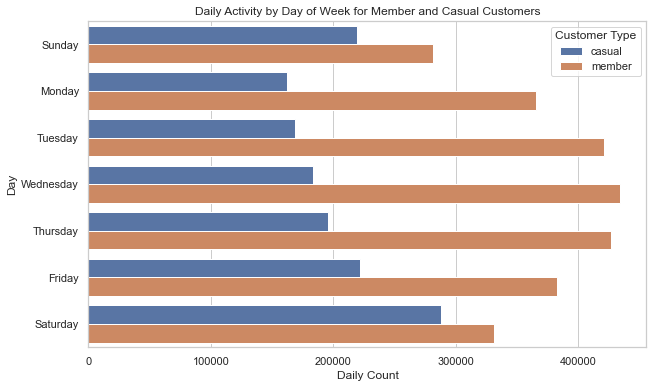

In [62]:
plt.figure(figsize=(10, 6))
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.barplot(data=daily_activity, y='day_of_week', x='daily_count', hue='member_casual', orient='h',order=day_order)
plt.xlabel('Daily Count')
plt.ylabel('Day')
plt.title('Daily Activity by Day of Week for Member and Casual Customers')
plt.legend(title='Customer Type')
plt.show()